In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
profe = pd.read_csv('/content/colonias_final.csv')

In [ ]:
profe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             720 non-null    int64  
 1   ID                     720 non-null    int64  
 2   POSTALCODE             720 non-null    int64  
 3   ST_NAME                720 non-null    object 
 4   MUN_NAME               720 non-null    object 
 5   SETT_NAME              720 non-null    object 
 6   SETT_TYPE              720 non-null    object 
 7   AREA                   720 non-null    float64
 8   Shape_Leng             720 non-null    float64
 9   Shape_Area             720 non-null    float64
 10  geometry               720 non-null    object 
 11  precio/metro_cuadrado  719 non-null    float64
dtypes: float64(4), int64(3), object(5)
memory usage: 67.6+ KB


In [ ]:
yo = pd.read_csv('/content/colonias_precio_m2_cdmx.csv')

In [ ]:
yo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    2097 non-null   int64  
 1   POSTALCODE  2097 non-null   int64  
 2   ST_NAME     2097 non-null   object 
 3   MUN_NAME    2097 non-null   object 
 4   SETT_NAME   2097 non-null   object 
 5   SETT_TYPE   2097 non-null   object 
 6   AREA        2097 non-null   float64
 7   Shape_Leng  2097 non-null   float64
 8   Shape_Area  2097 non-null   float64
 9   geometry    2097 non-null   object 
 10  precio_m2   398 non-null    float64
 11  colonia     398 non-null    object 
 12  alcaldia    398 non-null    object 
 13  estado      398 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 229.5+ KB


In [ ]:
# promedios de precios
print(profe[['precio/metro_cuadrado']].mean())
print(yo[['precio_m2']].mean())

precio/metro_cuadrado    32590.139082
dtype: float64
precio_m2    50233.733487
dtype: float64


In [ ]:
pd.options.display.float_format = '{:.5f}'.format

print(profe[['precio/metro_cuadrado']].describe())
print('\n')
print(yo[['precio_m2']].describe())

       precio/metro_cuadrado
count              719.00000
mean             32590.13908
std              15047.46747
min                344.00000
25%              22191.50000
50%              31463.00000
75%              41075.00000
max             124231.00000


          precio_m2
count     398.00000
mean    50233.73349
std     83265.59728
min       882.50000
25%     28119.23918
50%     39274.96241
75%     53017.99817
max   1375943.82074


In [ ]:
print(profe['precio/metro_cuadrado'].isnull().sum())
print(yo['precio_m2'].isnull().sum())

1
1699


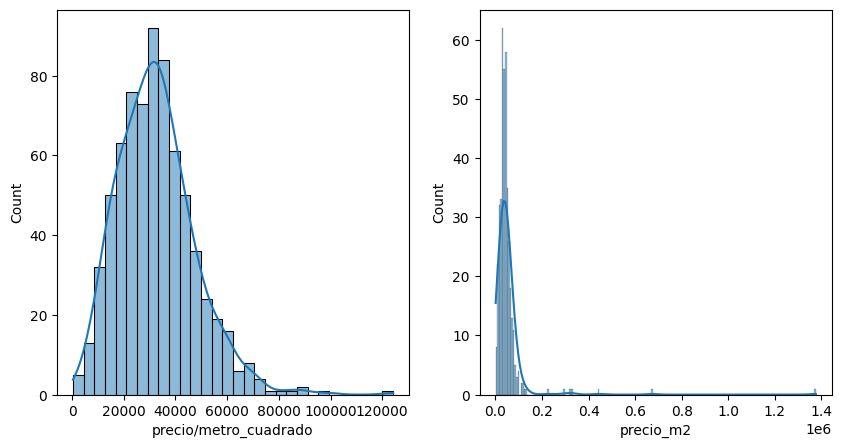

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(profe['precio/metro_cuadrado'], ax=ax[0], kde=True)
sns.histplot(yo['precio_m2'], ax=ax[1], kde=True)
plt.show()

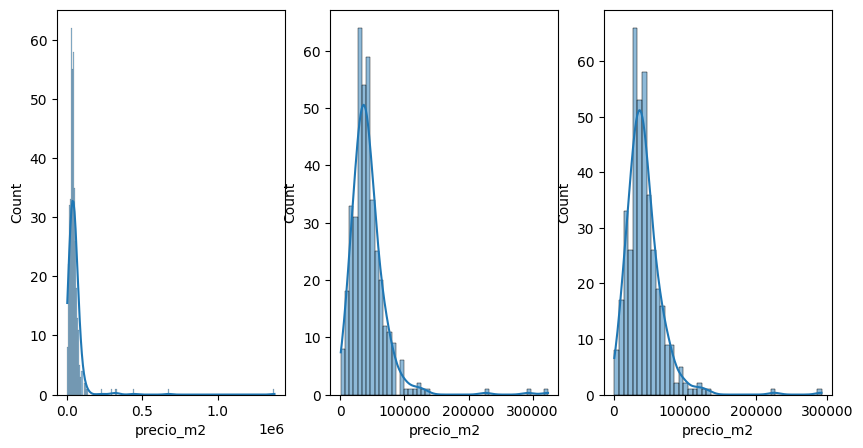

In [ ]:
quantiles = yo[yo['precio_m2'] < yo['precio_m2'].quantile(0.99)]['precio_m2']
zscore = yo[np.abs(yo['precio_m2'] - yo['precio_m2'].mean()) <= (3 * yo['precio_m2'].std())]['precio_m2']

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
sns.histplot(yo['precio_m2'], ax=ax[0], kde=True)
sns.histplot(quantiles, ax=ax[1], kde=True)
sns.histplot(zscore, ax=ax[2], kde=True)
plt.show()

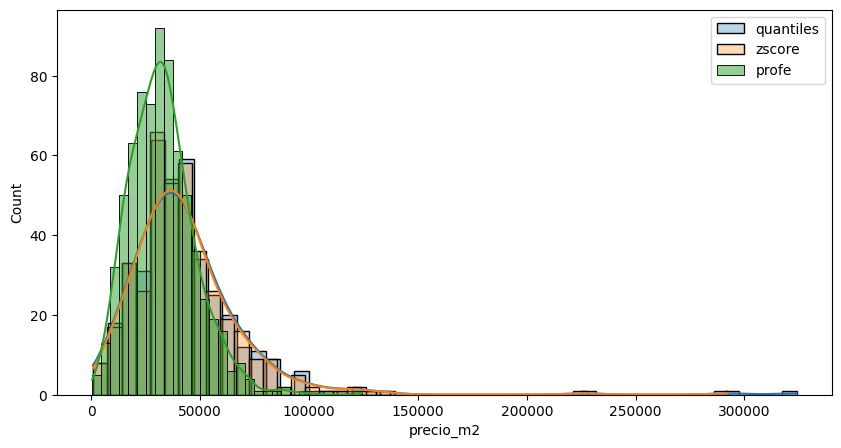

In [ ]:
# in a single graph, show zscore and quantiles
plt.figure(figsize=(10, 5))
# sns.histplot(yo['precio_m2'], kde=True, label='original', alpha=0.5)
sns.histplot(profe['precio/metro_cuadrado'], label='profe', kde=True)
sns.histplot(zscore, kde=True, label='zscore', alpha=0.3)
sns.histplot(quantiles, kde=True, label='quantiles', alpha=0.3)
plt.legend()

In [ ]:
# print up to the 4th momentum of the distributions
print(yo['precio_m2'].mean())
print(yo['precio_m2'].var())
print(yo['precio_m2'].skew())
print(yo['precio_m2'].kurtosis())
print('\n')
print(profe['precio/metro_cuadrado'].mean())
print(profe['precio/metro_cuadrado'].var())
print(profe['precio/metro_cuadrado'].skew())
print(profe['precio/metro_cuadrado'].kurtosis())
print('\n')
print(quantiles.mean())
print(quantiles.var())
print(quantiles.skew())
print(quantiles.kurtosis())
print('\n')
print(zscore.mean())
print(zscore.var())
print(zscore.skew())
print(zscore.kurtosis())

50233.73348690278
6933159690.796047
11.803946159338388
171.37669088577195


32590.139082058413
226426277.3288188
0.9394405238459356
2.4973446637135632


43586.156785113875
914192729.9510399
4.330059280387193
32.62478162278163


42872.70998077322
715464751.9545646
3.3973147972685216
24.415405607576705


In [ ]:
print(zscore.describe())

count      393.00000
mean     42872.70998
std      26748.17287
min        882.50000
25%      28037.99128
50%      38817.22854
75%      52043.93635
max     292592.59259
Name: precio_m2, dtype: float64


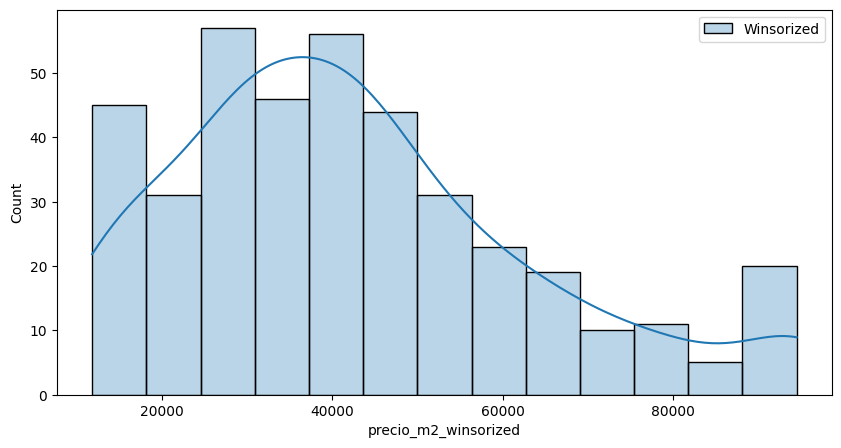

42454.46397984981
439206989.3124651
0.7746986683530189
0.15629200422262324
count     398.00000
mean    42454.46398
std     20957.26579
min     11827.95699
25%     28119.23918
50%     39274.96241
75%     53017.99817
max     94516.89883
Name: precio_m2_winsorized, dtype: float64


In [ ]:
from scipy.stats.mstats import winsorize

# Create a new column for the winsorized data
yo['precio_m2_winsorized'] = yo['precio_m2']

# Apply Winsorization to the non-missing values in the new column
yo.loc[yo['precio_m2'].notna(), 'precio_m2_winsorized'] = winsorize(yo['precio_m2'].dropna(), limits=[0.05, 0.05])

winsorize = yo['precio_m2_winsorized']

# Plot the original and Winsorized distributions
plt.figure(figsize=(10, 5))
# sns.histplot(yo['precio_m2'], kde=True, label='Original', alpha=0.5)
sns.histplot(winsorize, kde=True, label='Winsorized', alpha=0.3)
# sns.histplot(profe['precio/metro_cuadrado'], label='profe', kde=True)
# sns.histplot(quantiles, label='quantiles', kde=True, alpha=0.3)
# sns.histplot(zscore, label='zscore', kde=True, alpha=0.3)
plt.legend()
plt.show()

print(winsorize.mean())
print(winsorize.var())
print(winsorize.skew())
print(winsorize.kurtosis())
print(winsorize.describe())

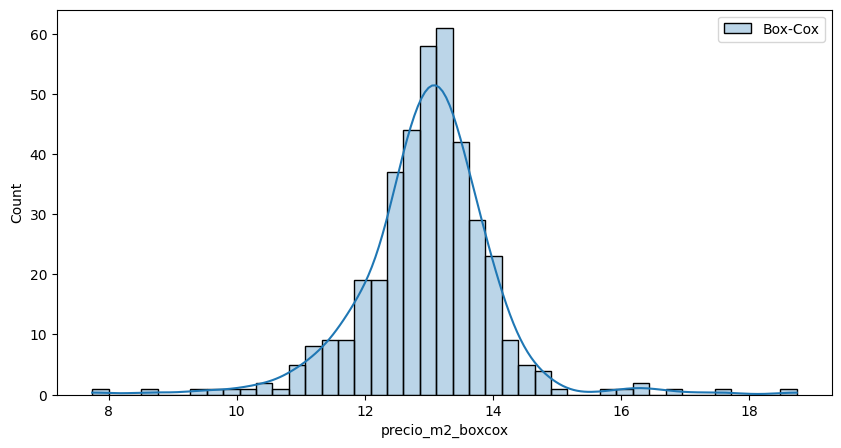

12.976320141559778
1.0993950309264646
0.051495278858384765
5.8991657180999955
count   398.00000
mean     12.97632
std       1.04852
min       7.74315
25%      12.53935
50%      13.03679
75%      13.48893
max      18.74432
Name: precio_m2_boxcox, dtype: float64


In [ ]:
# aplicar box-cox
from scipy.stats import boxcox

# Apply boxcox to the non-missing values of the column
precio_m2_boxcox, lmbda = boxcox(yo['precio_m2'].dropna())

# Create a new column with the transformed values
yo['precio_m2_boxcox'] = pd.Series(precio_m2_boxcox, index=yo['precio_m2'].dropna().index)

# Plot the distribution of the transformed data
plt.figure(figsize=(10, 5))
sns.histplot(yo['precio_m2_boxcox'], kde=True, label='Box-Cox', alpha=0.3)
plt.legend()
plt.show()

print(yo['precio_m2_boxcox'].mean())
print(yo['precio_m2_boxcox'].var())
print(yo['precio_m2_boxcox'].skew())
print(yo['precio_m2_boxcox'].kurtosis())
print(yo['precio_m2_boxcox'].describe())

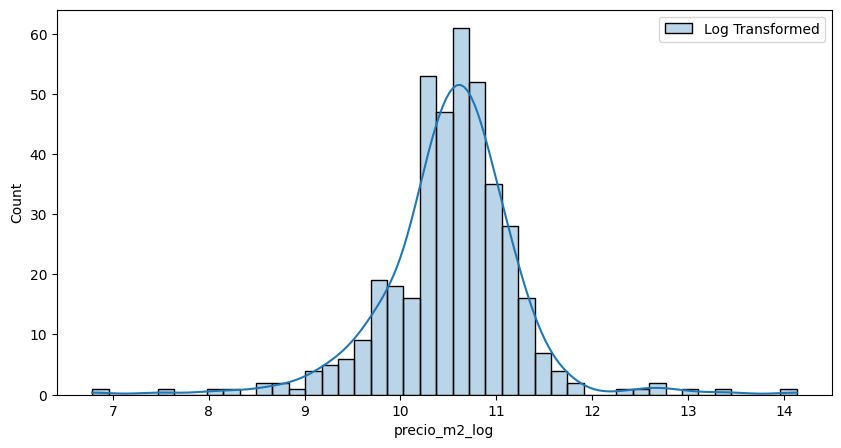

10.528601970722217
0.49324312308732315
-0.2584757769582924
5.790378045377313
count   398.00000
mean     10.52860
std       0.70231
min       6.78389
25%      10.24424
50%      10.57837
75%      10.87840
max      14.13465
Name: precio_m2_log, dtype: float64


In [ ]:
# Apply a logarithmic transformation to the 'precio_m2' column
yo['precio_m2_log'] = np.log1p(yo['precio_m2'])

# Plot the distribution of the transformed data
plt.figure(figsize=(10, 5))
sns.histplot(yo['precio_m2_log'], kde=True, label='Log Transformed', alpha=0.3)
plt.legend()
plt.show()

print(yo['precio_m2_log'].mean())
print(yo['precio_m2_log'].var())
print(yo['precio_m2_log'].skew())
print(yo['precio_m2_log'].kurtosis())
print(yo['precio_m2_log'].describe())